# Capstone Project - The Battle of Neighborhoods (Final Part)
6th March 2020

####  What to be accomplished in the final part of project  <br>
1) Introduction where you discuss the business problem and who would be interested in this project.<br>
2) Data where you describe the data that will be used to solve the problem and the source of the data.<br>
3) Methodology section which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, if any, and what machine learnings were used and why.<br>
4) Results section where you discuss the results.<br>
5) Discussion section where you discuss any observations you noted and any recommendations you can make based on the results.<br>
6) Conclusion section where you conclude the report.


In [2]:
## Required Libraries to be imported

In [3]:
import numpy as np  
import time
import pandas as pd  
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json  
import requests  
from pandas.io.json import json_normalize 
print('Libraries imported.')

Libraries imported.


In [4]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Libraries imported.


In [6]:
## Conda
!conda install -c conda-forge geopy --yes  
from geopy.geocoders import Nominatim  

!conda install -c conda-forge folium=0.5.0 --yes  

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.21.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

In [7]:
## Folium
import folium # map rendering library
import folium # map rendering library
from folium import plugins
print('Libraries imported.')

Libraries imported.


### Introduction:
My Use Case: I am working @ XYZ Company and residing in Schaumburg, Chicago area. My location is walking distance from Woodfield mall and very close to all basic required amenities. I enjoy many amenities and venues in the area, such as various international and Indian restaurants, cafes, food shops and entertainment. I have been offered a great opportunity to work for a same company XYZ in New York City. I am excited and I want to use this opportunity to trail run what I have had learned so far in Coursera in order to get answer to relevant potential questions. Question could be how can I find a convenient and enjoyable place like I have in Schaumburg, Chicago? Idea is to use and apply my learning during the course. In order to make a comparison and evaluation of the rental options in NY, I must set some basis, therefore the apartment in NY must meet the following demands: <Br>

• Apartment must be 1 bedrooms <Br>
• Location is near a metro station in the NY suburb and within 1.0 mile <Br>
• Price of rent not exceed $XXXXX per month <Br>
• Amenities in the neighborhood should be similar to current residence <Br>
• Venues such as coffee shops, Indian restaurants, gym and Asian food shops <Br>
• I have included a map of venues near current residence in Schaumburg, Chicago. <Br>


### Problem Statement:
The challenge is to find a suitable apartment/studio for rent in or around NY city that complies with the demands on location, price and venues. The data required to resolve this challenge is described in the following section

In [8]:
## A description of the data and how it will be used to solve the problem

### Reference of Data around current residence in Schaumburg , Chicago for comparison to NY City/New Place (Staten Island/Brooklyn/Manhattan/The Bronx/Queens/Long Island.)

In [9]:
# Chicago
address = 'Schaumburg, Chicago'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Chicago home are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Chicago home are 42.024937300000005, -88.06305248648468.


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


In [10]:
neighborhood_latitude=42.024937300000005
neighborhood_longitude=-88.06305248648468

#### These celles is to leverage Foursquare data around Schaumburg, Chicago


In [11]:
# The code was removed by Watson Studio for sharing.

In [12]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

In [13]:
results = requests.get(url).json()


In [14]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [15]:
venues = results['response']['groups'][0]['items']
    
SGnearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
SGnearby_venues =SGnearby_venues.loc[:, filtered_columns]

# filter the category for each row
SGnearby_venues['venue.categories'] = SGnearby_venues.apply(get_category_type, axis=1)

# clean columns
SGnearby_venues.columns = [col.split(".")[-1] for col in SGnearby_venues.columns]

SGnearby_venues.head(15)

,name,categories,lat,lng
0,Maxfield's Pancake House,Breakfast Spot,42.029146,-88.061800
1,Schaumburg Prairie Center for the Arts,Performing Arts Venue,42.025993,-88.067020
2,Bawarchi Biryani Point,Indian Restaurant,42.027498,-88.059736
3,Volkening Heritage Farm,Farm,42.023838,-88.061172
4,Patel Brothers,Grocery Store,42.027654,-88.059611
5,Baskin-Robbins,Ice Cream Shop,42.027741,-88.059312
6,The UPS Store,Shipping Store,42.027485,-88.059264
7,Redbox,Video Store,42.028480,-88.061477
8,Dunkin',Donut Shop,42.027776,-88.059315
9,Walgreens,Pharmacy,42.028743,-88.061441


### Data Section: Description of Data
The following data is required to answer the issues of the problem: • List of Boroughs and neighborhoods of NY with their GeoData (latitude and longitude)  <Br>
• List of Metro stations/Bus Station in and around NY with their address location <Br>
• List of apartments for rent in surrounding area with their addresses and price <Br>
• List of apartment for rent with additional information, such as price, address, area <Br>
• Venues for each neighborhood

#### How the data will be used to solve the problem <Br>
The data will be used as follows: <Br>
• Use Foursquare and GeoPy data to map top 10 venues for all neighborhoods and clustered in groups <Br>
• Use foursquare and GeoPy data to map the location of subway metro stations , separately and on top of the above clustered map in order to be able to identify the venues and amenities near each metro station, or explore each subway location separately <Br>
• Use Foursquare and GeoPy data to map the location of rental places <Br>
• Create a map that depicts the average rental price around a radius of 1.0 mile around each subway station <Br>
• Addresses from rental locations will be converted to GeoData (latitude and longitude) using GeoPy -distance and Nominatim. <Br>
• Data will be searched in open data sources if available, from real estate sites if open to reading, libraries or other government  
    agencies such as Metro New York MTA, etc. 


The processing of these data will allow to answer the key questions to make a decision: <Br>
• What is the cost of apartment rent around a mile radius from each subway metro station? <Br>
• What is the area of suburb with best rental pricing that meets criteria established?<Br>
• What is the distance from work place and the tentative future home?<Br>
• What are the venues of the two best places to live? <Br>
• How venues distribute among neighborhoods and around metro stations?<Br>
• Any other interesting statistical data findings of the real estate and overall data.<Br>

Few data reference links which are leverage for demonstration. <Br>
https://en.wikipedia.org/wiki/List_of_New_York_City_Subway_stations_in_Manhattan
https://www.google.com/maps/search/manhattan+subway+metro+stations/@40.7837297,-74.1033043,11z/data=!3m1!4b1

A list of places for rent was collected by web-browsing real estate companies in NYC <Br>
    http://www.rentmanhattan.com/index.cfm?page=search&state=results 
https://www.nestpick.com/search?city=new-york&page=1&order=relevance&district=manhattan&gclid=CjwKCAiAjNjgBRAgEiwAGLlf2hkP3A-cPxjZYkURqQEswQK2jKQEpv_MvKcrIhRWRzNkc_r-fGi0lxoCA7cQAvD_BwE&type=apartment&display=listhttps://www.realtor.com/apartments/Manhattan_NY 


#### I will be using spreadsheet having required data for evaluation thru pandas dataframe  

### Methodology section:
This section will represents the main component of the report how the data is gathered, prepared for analysis.  .
 
The strategy is based on mapping described data description section in order to facilitate the choice. The choice is made based on the location near a subway, rental price and similar venues to Schaumburg chicago. This visual approach and maps with popups labels allow quick identification of location, price and feature, thus making the selection very easy.


Processing of these DATA and its mapping will allow to answer the key questions to make a decision: <Br>
•	Cost of available rental places that meet the demands?<Br>
•	Cost of rent around a mile radius from each subway metro station?<Br>
•	Area of NYC with best rental pricing that meets criteria established?<Br>
•	What are the venues of the two best places to live?  <Br>
•	How venues distribute among NYC neighborhoods and around metro stations?<Br>
•	Any other interesting statistical data findings of the real estate and overall data.<Br>


### Map of Schaumburg Chicago with venues near residence place - for reference

In [16]:

# create map of Chicago place  using latitude and longitude values
map_sg = folium.Map(location=[latitude, longitude], zoom_start=20)

# add markers to map
for lat, lng, label in zip(SGnearby_venues['lat'], SGnearby_venues['lng'], SGnearby_venues['name']):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=4,
        radius=10,
        popup=label,
        color='blue',
        fill_color='#0f0f0f',
        fill_opacity=0.7,
    ).add_to(map_sg)  
    
map_sg

### NY NEIGHBORHOODS (Staten Island/Brooklyn/Manhattan/The Bronx/Queens/Long Island)  - DATA AND MAPPING

## Note: For simplification and demonstration, I am planning to use one location (Manhattan). One of the most popular and expensive location  

#### In below cell I am importing xls containing the neighborhoods around the 40 Boroughs. This is just for consolidation of report.


In [17]:
# The code was removed by Watson Studio for sharing.

,Sr No,Borough,Neighborhood,Latitude,Longitude,Cluster Labels
0,1,Manhattan,Marble Hill,40.876551,-73.910660,2
1,2,Manhattan,Chinatown,40.715618,-73.994279,2
2,3,Manhattan,Washington Heights,40.851903,-73.936900,4
3,4,Manhattan,Inwood,40.867684,-73.921210,3
4,5,Manhattan,Hamilton Heights,40.823604,-73.949688,0


In [18]:
manhattan_data.tail()

,Sr No,Borough,Neighborhood,Latitude,Longitude,Cluster Labels
35,36,Manhattan,Turtle Bay,40.752042,-73.967708,3
36,37,Manhattan,Tudor City,40.746917,-73.971219,3
37,38,Manhattan,Stuyvesant Town,40.731000,-73.974052,4
38,39,Manhattan,Flatiron,40.739673,-73.990947,3
39,40,Manhattan,Hudson Yards,40.756658,-74.000111,2


### Get data with top 10 clustered venues from spreadsheet.

In [19]:
# The code was removed by Watson Studio for sharing.

,Sr No,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Manhattan,Marble Hill,40.876551,-73.910660,2,Coffee Shop,Discount Store,Yoga Studio,Steakhouse,Supplement Shop,Tennis Stadium,Shoe Store,Gym,Bank,Seafood Restaurant
1,2,Manhattan,Chinatown,40.715618,-73.994279,2,Chinese Restaurant,Cocktail Bar,Dim Sum Restaurant,American Restaurant,Vietnamese Restaurant,Salon / Barbershop,Noodle House,Bakery,Bubble Tea Shop,Ice Cream Shop
2,3,Manhattan,Washington Heights,40.851903,-73.936900,4,Café,Bakery,Mobile Phone Shop,Pizza Place,Sandwich Place,Park,Gym,Latin American Restaurant,Tapas Restaurant,Mexican Restaurant
3,4,Manhattan,Inwood,40.867684,-73.921210,3,Mexican Restaurant,Lounge,Pizza Place,Café,Wine Bar,Bakery,American Restaurant,Park,Frozen Yogurt Shop,Spanish Restaurant
4,5,Manhattan,Hamilton Heights,40.823604,-73.949688,0,Mexican Restaurant,Coffee Shop,Café,Deli / Bodega,Pizza Place,Liquor Store,Indian Restaurant,Sushi Restaurant,Sandwich Place,Yoga Studio
5,6,Manhattan,Manhattanville,40.816934,-73.957385,3,Deli / Bodega,Italian Restaurant,Seafood Restaurant,Mexican Restaurant,Sushi Restaurant,Beer Garden,Coffee Shop,Falafel Restaurant,Bike Trail,Other Nightlife
6,7,Manhattan,Central Harlem,40.815976,-73.943211,2,African Restaurant,Seafood Restaurant,French Restaurant,American Restaurant,Cosmetics Shop,Chinese Restaurant,Event Space,Liquor Store,Beer Bar,Gym / Fitness Center
7,8,Manhattan,East Harlem,40.792249,-73.944182,4,Mexican Restaurant,Bakery,Latin American Restaurant,Deli / Bodega,Thai Restaurant,French Restaurant,Café,Taco Place,Street Art,Steakhouse
8,9,Manhattan,Upper East Side,40.775639,-73.960508,0,Italian Restaurant,Exhibit,Art Gallery,Bakery,Coffee Shop,French Restaurant,Cocktail Bar,Juice Bar,Hotel,Boutique
9,10,Manhattan,Yorkville,40.775930,-73.947118,2,Coffee Shop,Gym,Bar,Italian Restaurant,Sushi Restaurant,Pizza Place,Mexican Restaurant,Deli / Bodega,Japanese Restaurant,Pub


In [20]:
manhattan_merged.tail()

,Sr No,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
35,36,Manhattan,Turtle Bay,40.752042,-73.967708,3,Italian Restaurant,Coffee Shop,Steakhouse,Wine Bar,Sushi Restaurant,Hotel,Noodle House,Indian Restaurant,Japanese Restaurant,French Restaurant
36,37,Manhattan,Tudor City,40.746917,-73.971219,3,Café,Park,Pizza Place,Mexican Restaurant,Greek Restaurant,Sushi Restaurant,Hotel,Deli / Bodega,Diner,Dog Run
37,38,Manhattan,Stuyvesant Town,40.731000,-73.974052,4,Bar,Park,Boat or Ferry,Basketball Court,Coffee Shop,Baseball Field,Gas Station,Beer Garden,Harbor / Marina,Playground
38,39,Manhattan,Flatiron,40.739673,-73.990947,3,Italian Restaurant,American Restaurant,Gym,Gym / Fitness Center,Yoga Studio,Vegetarian / Vegan Restaurant,Bakery,Clothing Store,Cosmetics Shop,Cycle Studio
39,40,Manhattan,Hudson Yards,40.756658,-74.000111,2,Coffee Shop,Italian Restaurant,Hotel,Theater,American Restaurant,Café,Gym / Fitness Center,Thai Restaurant,Restaurant,Gym


#### I am using default value of popup, color, fill etc as used in lab

In [21]:
# create map of Manhattan using desire latitude and longitude values from Nominatim
latitude= 42.7308619
longitude= -71.9871558 

kclusters=5
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
  # add markers for rental places to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_clusters)    
    
       
map_clusters

### After examining data , it seems that cluster # 2 and 3 is close to Schaumburg Chicago place, so giving guidance as to where to look for the future apartment 

##Assign a value to 'kk' to explore a given cluster.

In [22]:
## kk is the cluster number to explore
kk = 2
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == kk, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,2,Coffee Shop,Discount Store,Yoga Studio,Steakhouse,Supplement Shop,Tennis Stadium,Shoe Store,Gym,Bank,Seafood Restaurant
1,Manhattan,2,Chinese Restaurant,Cocktail Bar,Dim Sum Restaurant,American Restaurant,Vietnamese Restaurant,Salon / Barbershop,Noodle House,Bakery,Bubble Tea Shop,Ice Cream Shop
6,Manhattan,2,African Restaurant,Seafood Restaurant,French Restaurant,American Restaurant,Cosmetics Shop,Chinese Restaurant,Event Space,Liquor Store,Beer Bar,Gym / Fitness Center
9,Manhattan,2,Coffee Shop,Gym,Bar,Italian Restaurant,Sushi Restaurant,Pizza Place,Mexican Restaurant,Deli / Bodega,Japanese Restaurant,Pub
14,Manhattan,2,Theater,Italian Restaurant,Coffee Shop,American Restaurant,Gym / Fitness Center,Hotel,Wine Shop,Spa,Gym,Indie Theater
23,Manhattan,2,Clothing Store,Boutique,Women's Store,Shoe Store,Men's Store,Furniture / Home Store,Italian Restaurant,Mediterranean Restaurant,Art Gallery,Design Studio
26,Manhattan,2,Coffee Shop,American Restaurant,Park,Bookstore,Pizza Place,Sandwich Place,Burger Joint,Café,Deli / Bodega,Tennis Court
34,Manhattan,2,Gym / Fitness Center,Italian Restaurant,Furniture / Home Store,Indian Restaurant,Dessert Shop,American Restaurant,Bakery,Juice Bar,Boutique,Sushi Restaurant
39,Manhattan,2,Coffee Shop,Italian Restaurant,Hotel,Theater,American Restaurant,Café,Gym / Fitness Center,Thai Restaurant,Restaurant,Gym


In [23]:
## Map of Manhattan places for rent


##Several Manhattan real estate webs were webscrapped to collect rental data, as mentioned in section data selection . The resut was summarized in a csv file for direct reading, in order to consolidate the proces.

In [24]:
## Use file without lat long and later derived lat long


In [25]:
# The code was removed by Watson Studio for sharing.

,Sr. No,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
0,1,West 105th Street,Upper West Side,2.94,5,3400,10000,NaN,NaN
1,2,East 97th Street,Upper East Side,3.57,3,2100,7500,NaN,NaN
2,3,West 105th Street,Upper West Side,1.89,4,2800,5300,NaN,NaN
3,4,CARMINE ST.,West Village,3.03,2,1650,5000,NaN,NaN
4,5,171 W 23RD ST.,Chelsea,3.45,2,1450,5000,NaN,NaN


In [26]:
mh_rent.tail()

,Sr. No,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
139,140,200 East 72nd Street,Rental in Lenox Hill,5.15,3,1700,8750,NaN,NaN
140,141,50 Murray Street,No fee rental in Tribeca,7.11,2,1223,8700,NaN,NaN
141,142,300 East 56th Street,No fee rental in Midtown East,3.87,3,2100,8118,NaN,NaN
142,143,1930 Broadway,No fee rental in Central Park West,5.06,2,1600,8095,NaN,NaN
143,144,33 West 9th Street,Rental in Greenwich Village,6.67,2,1500,10000,NaN,NaN


In [27]:
## Obtain geodata ( lat,long) for each rental place in Manhattan with Nominatim

In [28]:
## I am directly reading data from spread sheet.

In [29]:
# The code was removed by Watson Studio for sharing.

,Sr. No,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
0,1,76 CARMINE ST.,West Village,3.56,2,1350,4800,40.729631,-74.004440
1,2,E 91ST,Upper East Side,3.21,2,1450,4650,40.781059,-73.949421
2,3,333 east 81st street,Upper East Side,1.85,3,2430,4500,40.774324,-73.952836
3,4,EAST 88TH STREET,Upper East Side,3.21,2,1400,4500,40.779176,-73.950794
4,5,East 77th Street,Upper East Side,5.00,1,900,4500,40.772969,-73.958253


In [30]:
df_data_0.tail()

,Sr. No,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
129,130,9 East 78th Street,Rental in Park/Fifth Ave. to 79th St.,10.22,2,1370,14000,40.776118,-73.963165
130,131,510 East 14th Street,Rental in East Village,5.87,3,2130,12496,40.729972,-73.979762
131,132,26 Washington Square North,Rental in Greenwich Village,5.73,3,2180,12500,40.732266,-73.998186
132,133,360 West 34th Street,Rental in Midtown West,4.16,3,2240,9329,40.753011,-73.995934
133,134,360 West 34th Street,No fee rental in Midtown West,7.77,3,1200,9329,40.753011,-73.995934


### Manhattan apartment rent price data used just for plotting purpose for pictorial depiction.  

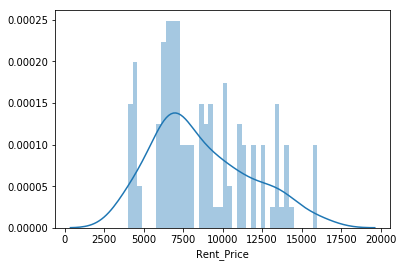

In [31]:
import seaborn as sns
sns.distplot(mh_rent['Rent_Price'],bins=40)

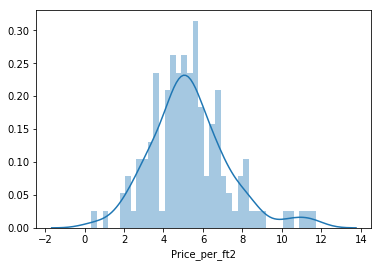

In [32]:
import seaborn as sns
sns.distplot(mh_rent['Price_per_ft2'],bins=40)

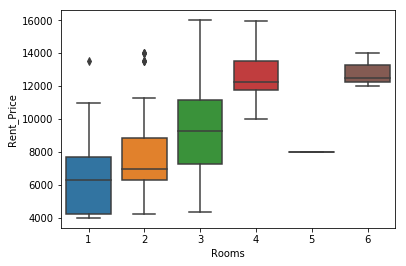

In [33]:
sns.boxplot(x='Rooms', y= 'Rent_Price', data=mh_rent)

### Map with popups will indicate the address and the monthly price for rent help to select the potential apartment with the desire price  

In [34]:

# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 45.7308619
longitude= -68.9871558

map_manhattan_rent = folium.Map(location=[latitude, longitude], zoom_start=15.5)

# add markers to map
for lat, lng, label in zip(mh_rent['Lat'], mh_rent['Long'],'$ ' + mh_rent['Rent_Price'].astype(str)+ ',  '+ mh_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan_rent) 
    

map_manhattan_rent

### Map with cluster venues 

In [35]:
##Map of Manhattan showing the places for rent and the cluster of venues

In [36]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 45.7308619
longitude= -68.9871558

# create map with clusters
kclusters=5
map_clusters2 = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters2)

# add markers to map for rental places
for lat, lng, label in zip(mh_rent['Lat'], mh_rent['Long'],'$ ' + mh_rent['Rent_Price'].astype(str)+ mh_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_clusters2)  
    
    # Adds tool to the top right
from folium.plugins import MeasureControl
map_manhattan_rent.add_child(MeasureControl())

# FMeasurement ruler icon to establish distnces on map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_manhattan_rent)

map_clusters2

### Rental place on map and its venues in details


In [37]:
##Now one can explore a particular rental place and its venues in detail

In [38]:

## kk is the cluster number to explore
kk = 3
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == kk, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Manhattan,3,Mexican Restaurant,Lounge,Pizza Place,Café,Wine Bar,Bakery,American Restaurant,Park,Frozen Yogurt Shop,Spanish Restaurant
5,Manhattan,3,Deli / Bodega,Italian Restaurant,Seafood Restaurant,Mexican Restaurant,Sushi Restaurant,Beer Garden,Coffee Shop,Falafel Restaurant,Bike Trail,Other Nightlife
10,Manhattan,3,Sushi Restaurant,Italian Restaurant,Coffee Shop,Gym / Fitness Center,Pizza Place,Burger Joint,Deli / Bodega,Gym,Sporting Goods Shop,Thai Restaurant
12,Manhattan,3,Italian Restaurant,Bar,Bakery,Vegetarian / Vegan Restaurant,Indian Restaurant,Coffee Shop,Cosmetics Shop,Wine Bar,Mexican Restaurant,Sushi Restaurant
16,Manhattan,3,Sandwich Place,Hotel,Japanese Restaurant,Gym / Fitness Center,Coffee Shop,Salon / Barbershop,Burger Joint,French Restaurant,Bar,Italian Restaurant
17,Manhattan,3,Coffee Shop,Italian Restaurant,Ice Cream Shop,Bakery,Nightclub,Theater,Art Gallery,Seafood Restaurant,American Restaurant,Hotel
18,Manhattan,3,Italian Restaurant,Sushi Restaurant,French Restaurant,Clothing Store,Chinese Restaurant,Café,Indian Restaurant,Bakery,Seafood Restaurant,Electronics Store
27,Manhattan,3,Italian Restaurant,Restaurant,Thrift / Vintage Store,Cocktail Bar,Bagel Shop,Coffee Shop,Pizza Place,Mexican Restaurant,Grocery Store,Wine Shop
29,Manhattan,3,Coffee Shop,Hotel,Gym,Wine Shop,Steakhouse,Bar,Italian Restaurant,Pizza Place,Park,Gym / Fitness Center
31,Manhattan,3,Italian Restaurant,French Restaurant,Cocktail Bar,Gift Shop,Bookstore,Grocery Store,Mexican Restaurant,Hotel,Sushi Restaurant,Coffee Shop


### Mapping Subway locations to enhance search


In [39]:
## Spreadsheet used to fetch the data.


In [40]:
# The code was removed by Watson Studio for sharing.

,Sr. No,sub_station,sub_address
0,1,57 Street Subway Station,"New York, NY 10106, USA"
1,2,Broad St,"New York, NY 10005, USA"
2,3,5 Av and 53 St,"New York, NY 10022, USA"
3,4,Broadway-Lafayette St Station,"E Houston St, New York, 10012, United States"
4,5,28 Street Station,"New York, NY 10001, USA"
5,6,42 St - Bryant Pk,"New York, NY 10018, USA"
6,7,Bowery Station,"Bowery, New York, NY 10002, USA"
7,8,34th Street-Hudson,"380-394 11th Ave, New York, NY 10001, USA"
8,9,47-50 Sts - Rockefeller Ctr,"New York, NY 10020, USA"
9,10,145 St,"New York, NY 10031, USA"


In [41]:
#Add colums labeled 'lat' and 'long' to be filled with geodata this will help to narrow the search

In [42]:
#  Add columns 'lat'  and 'long' to mh dataframe - with random temporary numbers to get started
sLength = len(mh['sub_station'])
lat = pd.Series(np.random.randn(sLength))
long=pd.Series(np.random.randn(sLength))
mh = mh.assign(lat=lat.values)
mh = mh.assign(long=long.values)

In [43]:
#Use pandas dataframe to get data from spreadsheet

In [44]:
# The code was removed by Watson Studio for sharing.

,Sr.No,sub_station,sub_address,lat,long
0,1,57 Street Subway Station,"New York, NY 10106, USA",40.764250,-73.954525
1,2,Broad St,"New York, NY 10005, USA",40.730862,-73.987156
2,3,5 Av and 53 St,"New York, NY 10022, USA",40.764250,-73.954525
3,4,Broadway-Lafayette St Station,"E Houston St, New York, 10012, United States",40.725684,-73.997726
4,5,28 Street Station,"New York, NY 10001, USA",40.730862,-73.987156
5,6,42 St - Bryant Pk,"New York, NY 10018, USA",40.730862,-73.987156
6,7,Bowery Station,"Bowery, New York, NY 10002, USA",40.720217,-73.993720
7,8,34th Street-Hudson,"380-394 11th Ave, New York, NY 10001, USA",40.753038,-74.003860
8,9,47-50 Sts - Rockefeller Ctr,"New York, NY 10020, USA",40.764250,-73.954525
9,10,145 St,"New York, NY 10031, USA",40.764250,-73.954525


In [45]:
# removing duplicate rows and creating new set mhsub1
mhsub1=mh.drop_duplicates(subset=['lat','long'], keep="last").reset_index(drop=True)
mhsub1.shape

(20, 5)

In [46]:

mhsub1.tail(10)

,Sr.No,sub_station,sub_address,lat,long
10,44,51 St Station,"Lexington &, E 51st St, New York, NY 10022, Un...",40.757148,-73.972078
11,47,77 St,"E 77th St, New York, NY 10075, USA",40.772969,-73.958253
12,48,Houston Street Station,"W Houston St, New York, NY 10014, USA",40.728618,-74.005311
13,50,Fulton Street Station,"Broadway, New York, NY 10038, USA",40.711909,-74.008034
14,58,181 St,"Fort Washington Ave, New York, NY 10033",40.849978,-73.938659
15,59,Fulton Street Subway Station,"135-167 Fulton St, New York, NY 10038, USA",40.710358,-74.007820
16,64,190 Street Subway Station,"Bennett Ave, New York, NY 10040, USA",40.858113,-73.932983
17,65,59 St-Lexington Av Station,"E 60th St, New York, NY 10065, USA",40.762259,-73.966271
18,69,Union Square Subway,"New York, NY 10003, United States",40.730862,-73.987156
19,70,50 St Br,"New York, NY 10019, United States",40.764250,-73.954525


In [47]:
##Generate MAP of Manhattan showing the location of subway stations

In [48]:

# map subway stations 
# create map of Manhattan using latitude and longitude values obtain previoulsy via Moninatim geolocator
latitude=45.7308619
longitude=-68.9871558

map_mhsub1 = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers of subway locations to map
for lat, lng, label in zip(mhsub1['lat'], mhsub1['long'],  mhsub1['sub_station'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(map_mhsub1) 
map_mhsub1

In [49]:
##Map of Manhattan showing places for rent + the subway locations nearby to narrow down the search

In [50]:
mh_rent.head()

,Sr. No,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
0,1,76 CARMINE ST.,West Village,3.56,2,1350,4800,40.729631,-74.004440
1,2,E 91ST,Upper East Side,3.21,2,1450,4650,40.781059,-73.949421
2,3,333 east 81st street,Upper East Side,1.85,3,2430,4500,40.774324,-73.952836
3,4,EAST 88TH STREET,Upper East Side,3.21,2,1400,4500,40.779176,-73.950794
4,5,East 77th Street,Upper East Side,5.00,1,900,4500,40.772969,-73.958253


In [51]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 40.7308619
longitude= -73.9871558

map_manhattan_rent = folium.Map(location=[latitude, longitude], zoom_start=13.3)

# add markers to map
for lat, lng, label in zip(mh_rent['Lat'], mh_rent['Long'],'$ ' + mh_rent['Rent_Price'].astype(str)+ mh_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan_rent) 
    
    # add markers of subway locations to map
for lat, lng, label in zip(mhsub1['lat'], mhsub1['long'],  mhsub1['sub_station'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(map_manhattan_rent) 
    
    # Adds tool to the top right
from folium.plugins import MeasureControl
map_manhattan_rent.add_child(MeasureControl())

# Measurement ruler icon tool to measure distances in map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_manhattan_rent)

map_manhattan_rent

In [52]:
##Generate Map of Manhattan with rental places, subway locations and cluster of venues

### Conventions : Red dots are Subway stations, Blue dots are apartments available for rent, Bubbles are the clusters of venues

In [53]:

# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 40.7308619
longitude= -73.9871558

map_mh_one = folium.Map(location=[latitude, longitude], zoom_start=13.3)

# add markers to map
for lat, lng, label in zip(mh_rent['Lat'], mh_rent['Long'],'$ ' + mh_rent['Rent_Price'].astype(str)+ ', '+mh_rent['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_mh_one) 
    
    # add markers of subway locations to map
for lat, lng, label in zip(mhsub1['lat'], mhsub1['long'],  mhsub1['sub_station'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(map_mh_one) 


# set color scheme for the clusters
kclusters=5
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_mh_one)

    # Adds tool to the top right
from folium.plugins import MeasureControl
map_mh_one.add_child(MeasureControl())

# Measurement ruler icon tool to measure distances in map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_mh_one)

map_mh_one

### Problem Resolution - Select the apartment for rent

In [54]:
## kk is the cluster number to explore
kk = 3
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == kk, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Manhattan,3,Mexican Restaurant,Lounge,Pizza Place,Café,Wine Bar,Bakery,American Restaurant,Park,Frozen Yogurt Shop,Spanish Restaurant
5,Manhattan,3,Deli / Bodega,Italian Restaurant,Seafood Restaurant,Mexican Restaurant,Sushi Restaurant,Beer Garden,Coffee Shop,Falafel Restaurant,Bike Trail,Other Nightlife
10,Manhattan,3,Sushi Restaurant,Italian Restaurant,Coffee Shop,Gym / Fitness Center,Pizza Place,Burger Joint,Deli / Bodega,Gym,Sporting Goods Shop,Thai Restaurant
12,Manhattan,3,Italian Restaurant,Bar,Bakery,Vegetarian / Vegan Restaurant,Indian Restaurant,Coffee Shop,Cosmetics Shop,Wine Bar,Mexican Restaurant,Sushi Restaurant
16,Manhattan,3,Sandwich Place,Hotel,Japanese Restaurant,Gym / Fitness Center,Coffee Shop,Salon / Barbershop,Burger Joint,French Restaurant,Bar,Italian Restaurant
17,Manhattan,3,Coffee Shop,Italian Restaurant,Ice Cream Shop,Bakery,Nightclub,Theater,Art Gallery,Seafood Restaurant,American Restaurant,Hotel
18,Manhattan,3,Italian Restaurant,Sushi Restaurant,French Restaurant,Clothing Store,Chinese Restaurant,Café,Indian Restaurant,Bakery,Seafood Restaurant,Electronics Store
27,Manhattan,3,Italian Restaurant,Restaurant,Thrift / Vintage Store,Cocktail Bar,Bagel Shop,Coffee Shop,Pizza Place,Mexican Restaurant,Grocery Store,Wine Shop
29,Manhattan,3,Coffee Shop,Hotel,Gym,Wine Shop,Steakhouse,Bar,Italian Restaurant,Pizza Place,Park,Gym / Fitness Center
31,Manhattan,3,Italian Restaurant,French Restaurant,Cocktail Bar,Gift Shop,Bookstore,Grocery Store,Mexican Restaurant,Hotel,Sushi Restaurant,Coffee Shop


In [55]:
##Venues for Apartment 2 - Cluster 3 (One can other cuslter also)


In [56]:
## kk is the cluster number to explore
kk = 3
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == kk, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Manhattan,3,Mexican Restaurant,Lounge,Pizza Place,Café,Wine Bar,Bakery,American Restaurant,Park,Frozen Yogurt Shop,Spanish Restaurant
5,Manhattan,3,Deli / Bodega,Italian Restaurant,Seafood Restaurant,Mexican Restaurant,Sushi Restaurant,Beer Garden,Coffee Shop,Falafel Restaurant,Bike Trail,Other Nightlife
10,Manhattan,3,Sushi Restaurant,Italian Restaurant,Coffee Shop,Gym / Fitness Center,Pizza Place,Burger Joint,Deli / Bodega,Gym,Sporting Goods Shop,Thai Restaurant
12,Manhattan,3,Italian Restaurant,Bar,Bakery,Vegetarian / Vegan Restaurant,Indian Restaurant,Coffee Shop,Cosmetics Shop,Wine Bar,Mexican Restaurant,Sushi Restaurant
16,Manhattan,3,Sandwich Place,Hotel,Japanese Restaurant,Gym / Fitness Center,Coffee Shop,Salon / Barbershop,Burger Joint,French Restaurant,Bar,Italian Restaurant
17,Manhattan,3,Coffee Shop,Italian Restaurant,Ice Cream Shop,Bakery,Nightclub,Theater,Art Gallery,Seafood Restaurant,American Restaurant,Hotel
18,Manhattan,3,Italian Restaurant,Sushi Restaurant,French Restaurant,Clothing Store,Chinese Restaurant,Café,Indian Restaurant,Bakery,Seafood Restaurant,Electronics Store
27,Manhattan,3,Italian Restaurant,Restaurant,Thrift / Vintage Store,Cocktail Bar,Bagel Shop,Coffee Shop,Pizza Place,Mexican Restaurant,Grocery Store,Wine Shop
29,Manhattan,3,Coffee Shop,Hotel,Gym,Wine Shop,Steakhouse,Bar,Italian Restaurant,Pizza Place,Park,Gym / Fitness Center
31,Manhattan,3,Italian Restaurant,French Restaurant,Cocktail Bar,Gift Shop,Bookstore,Grocery Store,Mexican Restaurant,Hotel,Sushi Restaurant,Coffee Shop


### Selection of Apartment
Using the map view it was easy to explore all possible option and make a good decision. <Br>

First option is very close all required amenities and transport facilities as well.  There is not much difference between cluster 2 and 3 outcomes.<Br>
However based on Schaumburg Chicago venues, Cluster 2 type of venues is a closer resemblance to my current place and desire place.


### Discussion

Though the learning was in very fast forward mode and I can understand the usage of lab work and doing actual implementation will differ specifically in my current DWH and Data management project but I am pretty much satisfied the the was course is structured. 

I am planning to go thru few lab exercises again that will help me to have more grip popular libraries. 

Capstone project is a very good opportunity to practice and apply the Data Science tools and methodologies at high level.  All these module boost the confidence to grab exciting opportunity in the area of data science.


### Conclusion 

I got what I wanted to learn and familiar myself with all function and libraries. Spending time and money is worth and I can and will recommend mu colleague to go thru this course and enhance the confidence.    

This project has shown a practical application to resolve a real most encountered situation using Data Science tools.¶

All function and libraries is very great and return info with very small code. 


## **** End of Project and last module **** Happy Learning 06 March 2020 ****

In [57]:
### :)